In [1]:
from PIL import Image
import numpy as np
import cv2

from image_processing import extract_quads, extract_rects, extract_polygons

(240, 320)


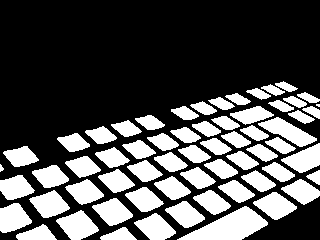

In [2]:
frame = 24

image = Image.open(f"blender/masks/keyboard_{frame:03d}.png").convert("RGB").resize((320, 240))
mask = (np.array(image)[:, :, 0] > 1).astype("uint8")
print(mask.shape)
Image.fromarray(255 * mask)

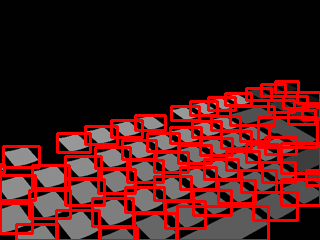

In [3]:
newimg = np.array(image)
for quad in extract_rects(mask):
    x, y, w, h = quad
    cv2.rectangle(newimg, (x, y), (x + w, y + h), (255, 0, 0), 2)

Image.fromarray(newimg)

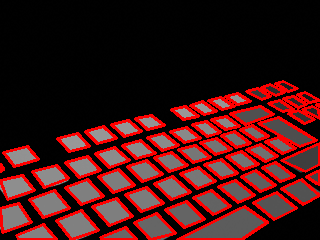

In [4]:
newimg = np.array(image)
for quad in extract_quads(mask):
    cv2.drawContours(newimg, [quad], 0, (255, 0, 0), 2)

Image.fromarray(newimg)

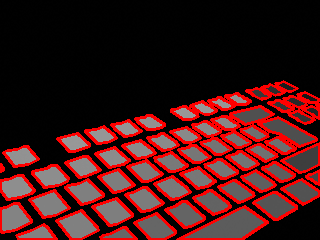

In [20]:
newimg = np.array(image)
for quad in extract_polygons(mask):
    cv2.drawContours(newimg, [quad], 0, (255, 0, 0), 2)

Image.fromarray(newimg)